In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# read in data, fix formatting as the dataset needed to be transposed and columns renamed
df = pd.read_csv('cpi_data.csv', header= None).transpose()
df.columns = df.iloc[0]
df = df[1:].set_index('variable')

df

,all_items_value,apparel_value,energy_value,food_value,gas_value,medical_value,transportation_value
variable,,,,,,,
1957-01-01,27.67,44.3,21.3,28.4,NaN,16.7,23.5
1957-02-01,27.8,44.3,21.4,28.7,NaN,16.7,23.7
1957-03-01,27.86,44.5,21.5,28.6,NaN,16.8,23.7
1957-04-01,27.93,44.4,21.6,28.6,NaN,16.9,23.8
1957-05-01,28.0,44.5,21.6,28.7,NaN,16.9,23.9
...,...,...,...,...,...,...,...
2022-03-01,287.708,127.044,305.469,295.809,380.763,588.223,341.104
2022-04-01,288.663,126.087,297.233,298.379,357.377,591.331,351.573
2022-05-01,291.474,126.927,308.839,301.879,372.063,593.887,356.018


## **Exploratory Data Analysis**

In [2]:
# what columns we are working with
df.columns

Index(['all_items_value', 'apparel_value', 'energy_value', 'food_value',
       'gas_value', 'medical_value', 'transportation_value'],
      dtype='object', name=0)

In [3]:
# find number of null values per column
df.isnull().sum()

0
all_items_value           0
apparel_value             0
energy_value              0
food_value                0
gas_value               120
medical_value             0
transportation_value      0
dtype: int64

In [4]:
# information about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 787 entries, 1957-01-01 to 2022-07-01
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   all_items_value       787 non-null    object
 1   apparel_value         787 non-null    object
 2   energy_value          787 non-null    object
 3   food_value            787 non-null    object
 4   gas_value             667 non-null    object
 5   medical_value         787 non-null    object
 6   transportation_value  787 non-null    object
dtypes: object(7)
memory usage: 49.2+ KB


In [5]:
# Shape of the dataset
print('Number of rows:', df.shape[0])
print('Number of columns:', df.shape[1])

Number of rows: 787
Number of columns: 7


In [6]:
#  find dtypes of each column
print(df.dtypes[:])

# change dtype of each column into floats from objects
df = df.astype('float64')
print('New data types:', df.dtypes[:])

0
all_items_value         object
apparel_value           object
energy_value            object
food_value              object
gas_value               object
medical_value           object
transportation_value    object
dtype: object
New data types: 0
all_items_value         float64
apparel_value           float64
energy_value            float64
food_value              float64
gas_value               float64
medical_value           float64
transportation_value    float64
dtype: object


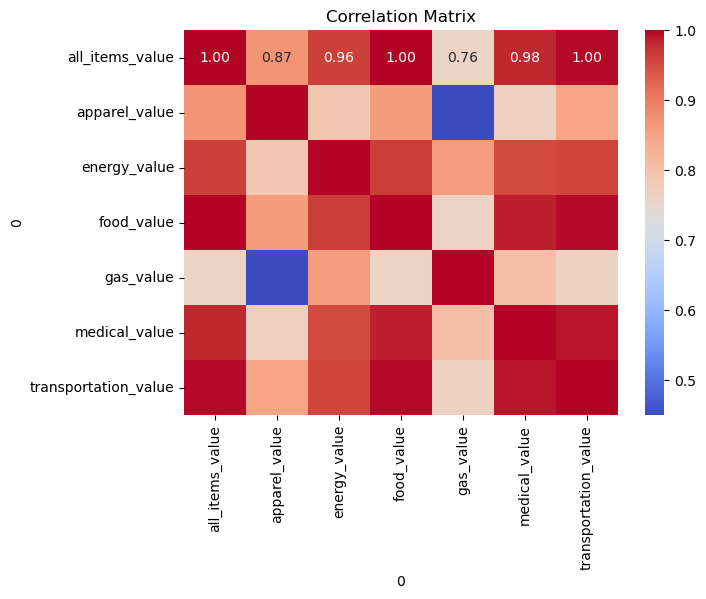

In [23]:
# plots a correlation matrix of the dataset
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(7, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

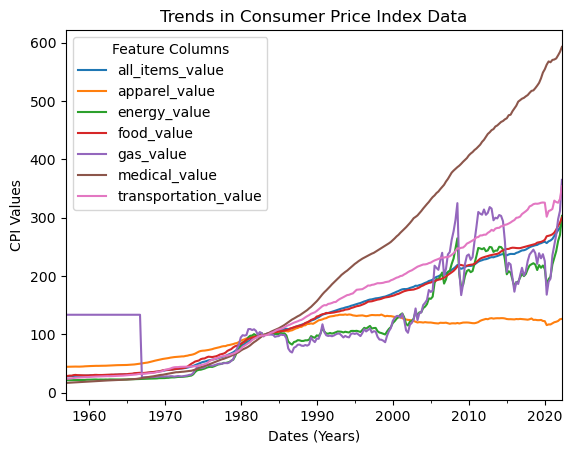

In [19]:
# plots resampled data using the mean from each quarter
df.index=pd.to_datetime(df.index)
quarterly_data = df.resample('Q').mean()
ax = quarterly_data.plot(title='Trends in Consumer Price Index Data')
plt.xlabel('Dates (Years)')
plt.ylabel('CPI Values')

legend = ax.legend()
legend.set_title('Feature Columns')

plt.show()

## **Feature Engineering and Data Cleaning**

- In the previous secton, we saw that the gas_value column is the only column containing null values. To address this inconsistency, we will fill in those null values with the mean value of all gas_values.

In [24]:
# filling in null values with the mean of that column
df = df.fillna(df['gas_value'].mean())
df

,all_items_value,apparel_value,energy_value,food_value,gas_value,medical_value,transportation_value
variable,,,,,,,
1957-01-01,27.670,44.300,21.300,28.400,133.560076,16.700,23.500
1957-02-01,27.800,44.300,21.400,28.700,133.560076,16.700,23.700
1957-03-01,27.860,44.500,21.500,28.600,133.560076,16.800,23.700
1957-04-01,27.930,44.400,21.600,28.600,133.560076,16.900,23.800
1957-05-01,28.000,44.500,21.600,28.700,133.560076,16.900,23.900
...,...,...,...,...,...,...,...
2021-12-01,280.126,124.117,263.553,287.440,304.315000,580.198,326.397
2022-01-01,281.933,125.433,265.929,289.959,301.791000,583.779,329.726
2022-02-01,284.182,126.342,275.170,292.912,321.849000,584.581,334.305


- Handles outliers by removing all rows having z-scores greater than 3 

In [25]:
from scipy import stats

df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)] 

print('Number of rows:', df.shape[0]) # only removes 3 rows from dataset
print('Number of columns:', df.shape[1])

Number of rows: 783
Number of columns: 7


## **Regression Modeling**

- As seen from the graph plotting all of the cpi column values, each feature seems to be in a linear relationship with all_items_value so our model of choice will be linear regression. 

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# years and values
x = df[['apparel_value', 'energy_value', 'food_value', 'gas_value', 'medical_value', 'transportation_value']]
y = df['all_items_value']

# split train and test datasets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [14]:
# fit the model with training data
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)

score = linear_regressor.score(X_test, y_test)
print('Score: ', score)
print('Accuracy: ' + str(score*100) + '%')


# Evaluate model performance
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Score:  0.9990085032562354
Accuracy: 99.90085032562354%
Mean Squared Error: 6.144179322452843


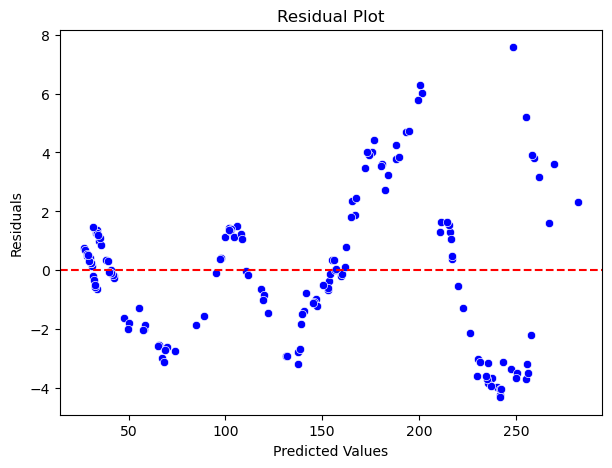

In [16]:
# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(7, 5))
sns.scatterplot(x=y_pred, y=residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')  # Add horizontal line at y=0
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()